# 1 - Import the libraries

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import keras 
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU, BatchNormalization

2024-02-06 14:50:52.256239: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 14:50:52.256386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 14:50:52.445562: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2 - Load the data, create the train, validation and test datasets, and show some sample images

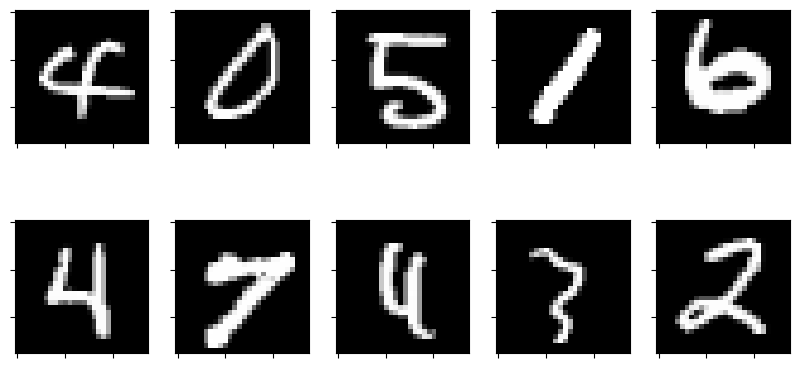

In [2]:
# Set random seed for reproducibility
np.random.seed(7)

# Load data from the mnist dataset and create train and test datasets 
mnist = loadmat('/kaggle/input/mnist-original/mnist-original.mat')
mnist_data = mnist["data"].T
mnist_data = mnist_data.reshape(len(mnist_data), 28, 28, 1)
mnist_label = mnist["label"][0]

X_train = mnist_data[0:60000]
y_train = mnist_label[0:60000]
X_test = mnist_data[60000:70000]
y_test = mnist_label[60000:70000]

n_classes = 10

# Change the labels from categorical to one-hot encoding
# e.g., class '3' transforms into vector [0,0,0,1,0,0,0,0,0,0]
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

# Divide the train dataset into train and validation datasets. 80% train / 20% validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# Show example images of digits 
n_rows = 2
n_cols = 5

plt.figure(figsize=(10,5))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(X_train[random.randint(0, len(X_train) - 1)], cmap=plt.get_cmap('gray'))

# 3 - Define the Convolutional Neural Network

In [3]:
# Define the Neural Network
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='linear', input_shape = (28,28,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        1

# 4 - Compile and fit the model

In [4]:
# Compile the NN 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the NN
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
375/375 [==============================] - 81s 206ms/step - loss: 0.4083 - accuracy: 0.8759 - val_loss: 0.0764 - val_accuracy: 0.9778
Epoch 2/20
375/375 [==============================] - 77s 204ms/step - loss: 0.1081 - accuracy: 0.9689 - val_loss: 0.0459 - val_accuracy: 0.9863
Epoch 3/20
375/375 [==============================] - 76s 204ms/step - loss: 0.0779 - accuracy: 0.9771 - val_loss: 0.0311 - val_accuracy: 0.9898
Epoch 4/20
375/375 [==============================] - 76s 204ms/step - loss: 0.0646 - accuracy: 0.9804 - val_loss: 0.0348 - val_accuracy: 0.9897
Epoch 5/20
375/375 [==============================] - 75s 201ms/step - loss: 0.0527 - accuracy: 0.9840 - val_loss: 0.0235 - val_accuracy: 0.9938
Epoch 6/20
375/375 [==============================] - 76s 202ms/step - loss: 0.0493 - accuracy: 0.9846 - val_loss: 0.0316 - val_accuracy: 0.9908
Epoch 7/20
375/375 [==============================] - 75s 201ms/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0246 - val_ac

# 5 - Evaluate the model

In [5]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

313/313 [==============================] - 5s 16ms/step - loss: 0.0216 - accuracy: 0.9941
Test Loss: 0.021589329466223717
Test Accuracy: 0.9940999746322632


# 6 - Show accuracy and loss plots of the model

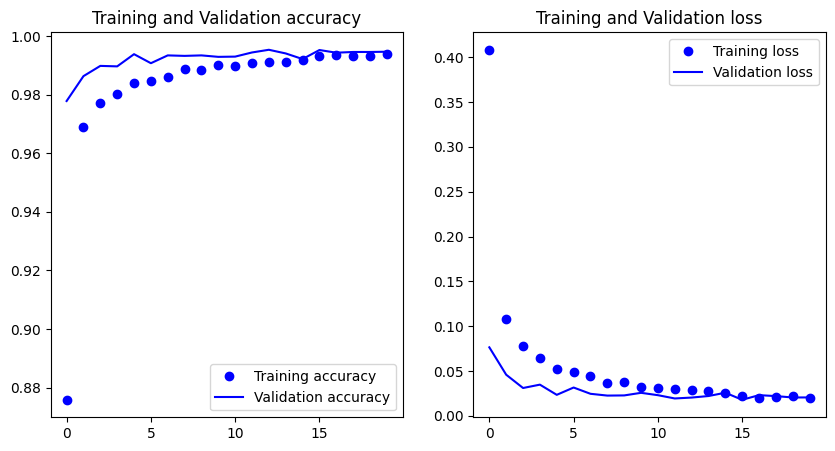

In [6]:
# Show accuracy and loss plots of the model 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.figure(figsize=(10,5))
ax = plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

ax = plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# 7 - Predict

In [7]:
# Obtain predictions. We get the predicted class and the second most probable class, with their probabilities
predicted_class = model.predict(X_test)
predicted_second_class = predicted_class.copy()

predicted_class_probability = np.max(predicted_class, axis=1)*100
predicted_class = np.argmax(predicted_class, axis=1)
true_class = np.argmax(y_test, axis=1)

# In 'predicted_second_class' we set the largest value to 0, to find the second largest value
for i in range(predicted_second_class.shape[0]):
    predicted_second_class[i, np.argmax(predicted_second_class[i])] = 0

predicted_second_class_probability = np.max(predicted_second_class, axis=1)*100
predicted_second_class = np.argmax(predicted_second_class, axis=1)

correct = []
incorrect = []

for i in range(len(predicted_class)):
    if predicted_class[i] == true_class[i]:
        correct.append(i)
    else:
        incorrect.append(i)

print('Correct predictions: ', len(correct))        
print('Incorrect predictions: ', len(incorrect))        

random.shuffle(correct)
random.shuffle(incorrect)

313/313 [==============================] - 5s 16ms/step
Correct predictions:  9941
Incorrect predictions:  59


# 8 - Show CORRECT predictions

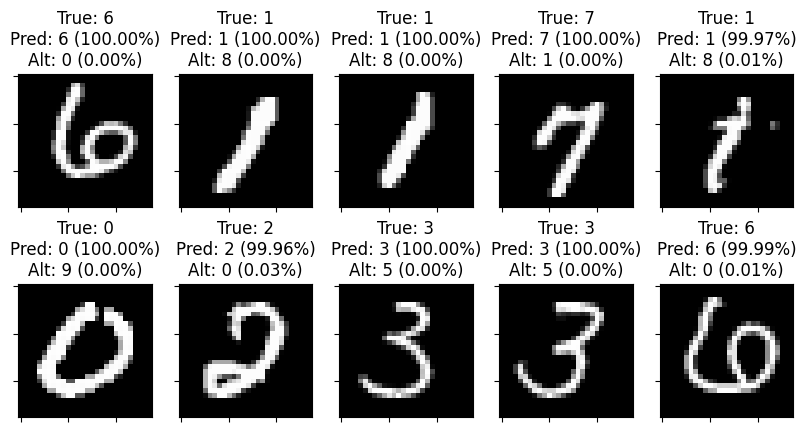

In [8]:
# Show some CORRECT PREDICTIONS
n_rows = 2
n_cols = 5

plt.figure(figsize=(10,5))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(X_test[correct[i]], cmap=plt.get_cmap('gray'))
    plt.title('True: ' + str(true_class[correct[i]]) + 
              '\nPred: ' + str(predicted_class[correct[i]]) + " (%.2f%%)" % predicted_class_probability[correct[i]] + 
              '\nAlt: ' + str(predicted_second_class[correct[i]]) + " (%.2f%%)" % predicted_second_class_probability[correct[i]])

# 9 - Show INCORRECT predictions

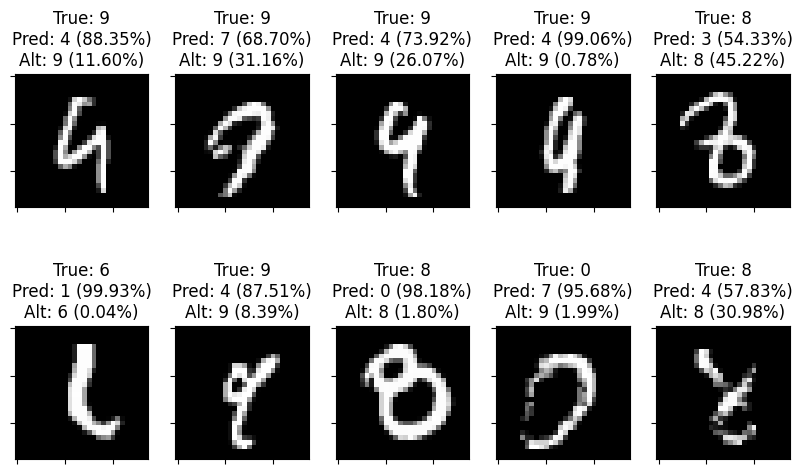

In [9]:
# Show some INCORRECT PREDICTIONS
n_rows = 2
n_cols = 5

plt.figure(figsize=(10, 3*n_rows))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(X_test[incorrect[i]], cmap=plt.get_cmap('gray'))
    plt.title('True: ' + str(true_class[incorrect[i]]) + 
              '\nPred: ' + str(predicted_class[incorrect[i]]) + " (%.2f%%)" % predicted_class_probability[incorrect[i]] + 
              '\nAlt: ' + str(predicted_second_class[incorrect[i]]) + " (%.2f%%)" % predicted_second_class_probability[incorrect[i]])

# 10 - Show Confussion Matrix

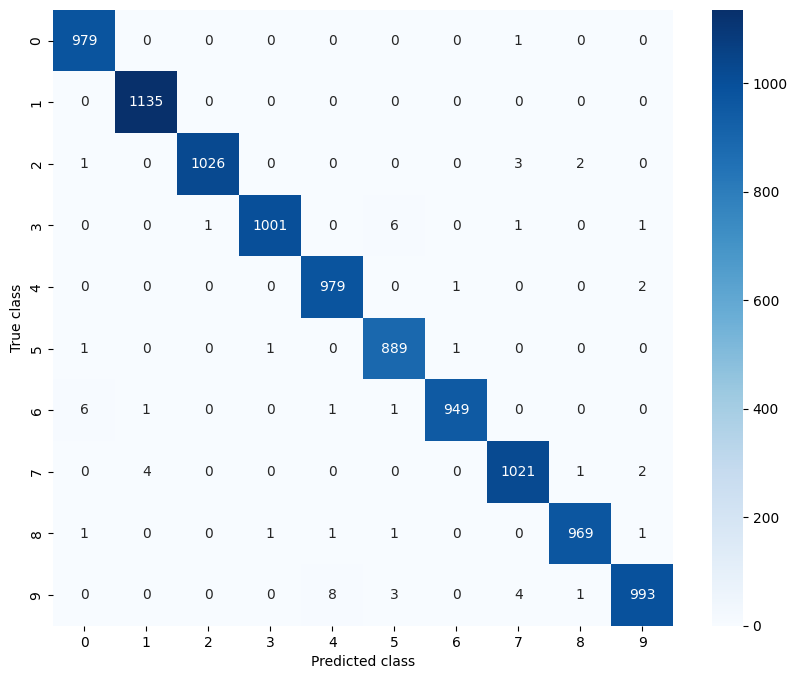

In [10]:
# Show confussion Matrix
cm = confusion_matrix(true_class, predicted_class)
plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

# 11 - Test model with "real" handwritten text

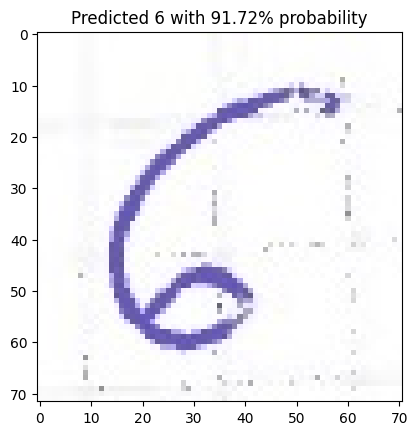

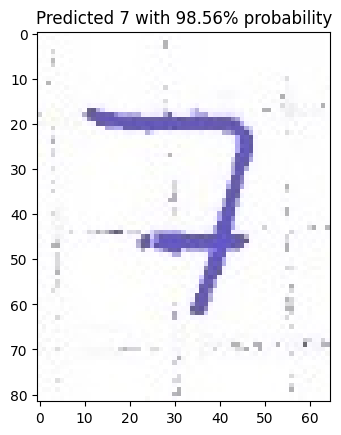

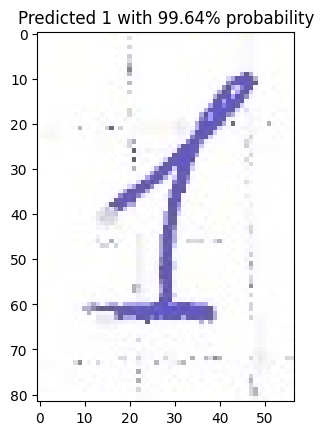

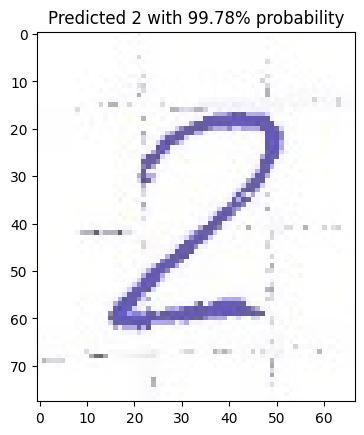

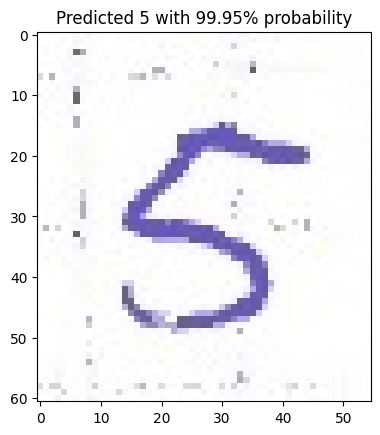

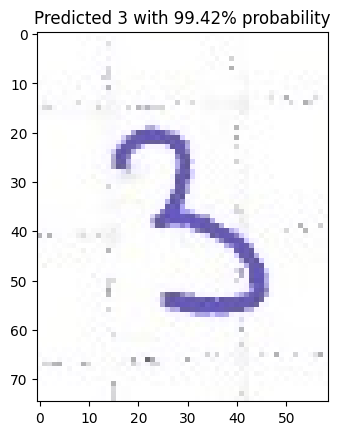

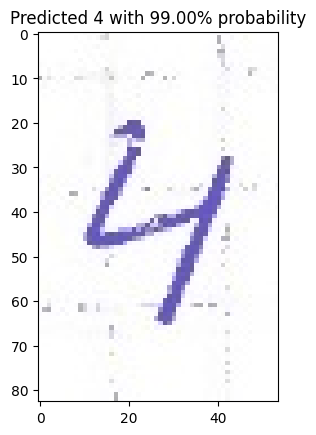

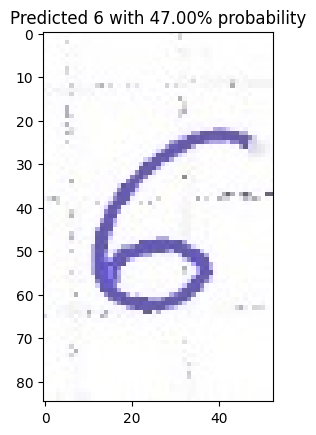

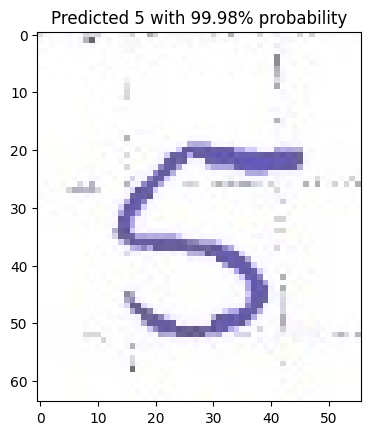

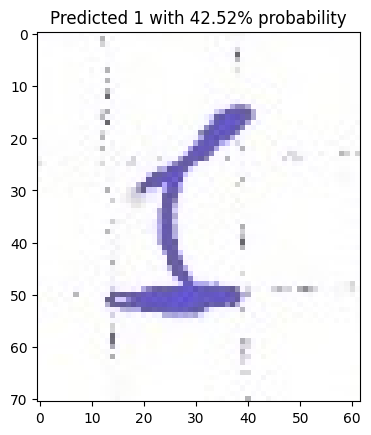

In [11]:
# Test model with real handwritten text
files = ['/kaggle/input/example-digits-1/digits_1.jpg', 
         '/kaggle/input/example-digits-1/digits_2.jpg',
         '/kaggle/input/example-digits-1/digits_3.jpg', 
         '/kaggle/input/example-digits-1/digits_4.jpg', 
         '/kaggle/input/example-digits-1/digits_5.jpg',
         '/kaggle/input/example-digits-1/digits_6.jpg',
         '/kaggle/input/example-digits-1/digits_7.jpg',
         '/kaggle/input/example-digits-1/digits_8.jpg',
         '/kaggle/input/example-digits-1/digits_9.jpg',
         '/kaggle/input/example-digits-1/digits_10.jpg']

for file in files:
    # Open, resize and reshape images
    img = cv2.imread(file)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    img_gray = cv2.resize(img_gray, (28, 28))
    img_gray = 255 - img_gray
    img_gray = img_gray.reshape(28,28,1)
    
    # Obtain predictions
    predicted_class = model.predict(img_gray[None,:,:], verbose=0)
    predicted_class_probability = np.max(predicted_class, axis=1)*100
    predicted_class = np.argmax(predicted_class, axis=1)
    
    # Show original images and predictions
    plt.imshow(img_rgb)
    plt.title('Predicted ' + str(predicted_class[0]) +  ' with %.2f%%' % predicted_class_probability[0] + ' probability')
    plt.show()